In [5]:
pip install pandas_datareader

     -------------------------------------- 109.5/109.5 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import yfinance as yf

start_date = '2020-01-01'
end_date = '2023-03-01'
symbols = ['PETR4.SA', 'ITSA4.SA', 'BRAP3.SA', 'BRAP4.SA', 'QUAL3.SA', 'VBBR3.SA', 'WIZS3.SA', 'BRSR6.SA', 'AESB3.SA', 'CSMG3.SA', 'BRIV4.SA', 'VALE3.SA', 'TRPL4.SA', 'VIVT3.SA', 'SUZB3.SA']
carteira = yf.download(start=start_date, end=end_date, tickers=symbols)
print(carteira.head())

[*********************100%***********************]  15 of 15 completed
           Adj Close                                                        \
            AESB3.SA   BRAP3.SA   BRAP4.SA  BRIV4.SA   BRSR6.SA   CSMG3.SA   
Date                                                                         
2020-01-02       NaN  20.016813  21.260201  7.745067  17.776392  17.037895   
2020-01-03       NaN  20.095509  21.562082  7.444212  17.656500  17.181091   
2020-01-06       NaN  19.954983  21.662710  7.714210  17.624527  16.819328   
2020-01-07       NaN  20.179829  21.757744  8.331347  17.704458  16.565598   
2020-01-08       NaN  20.011192  21.752153  8.315918  17.320797  16.573132   

                                                        ...   Volume  \
             ITSA4.SA   PETR4.SA   QUAL3.SA   SUZB3.SA  ... CSMG3.SA   
Date                                                    ...            
2020-01-02  10.633833  14.581378  35.308868  38.322563  ...  1251000   
2020-01-03  10.4

In [22]:
rolling_mean = carteira['Close'].rolling(50).mean()
rolling_mean.name = 'MA50'
carteira = carteira.join(rolling_mean)

C:\Users\pulpp\AppData\Local\Temp\ipykernel_6740\1004868200.py:3: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  carteira = carteira.join(rolling_mean)


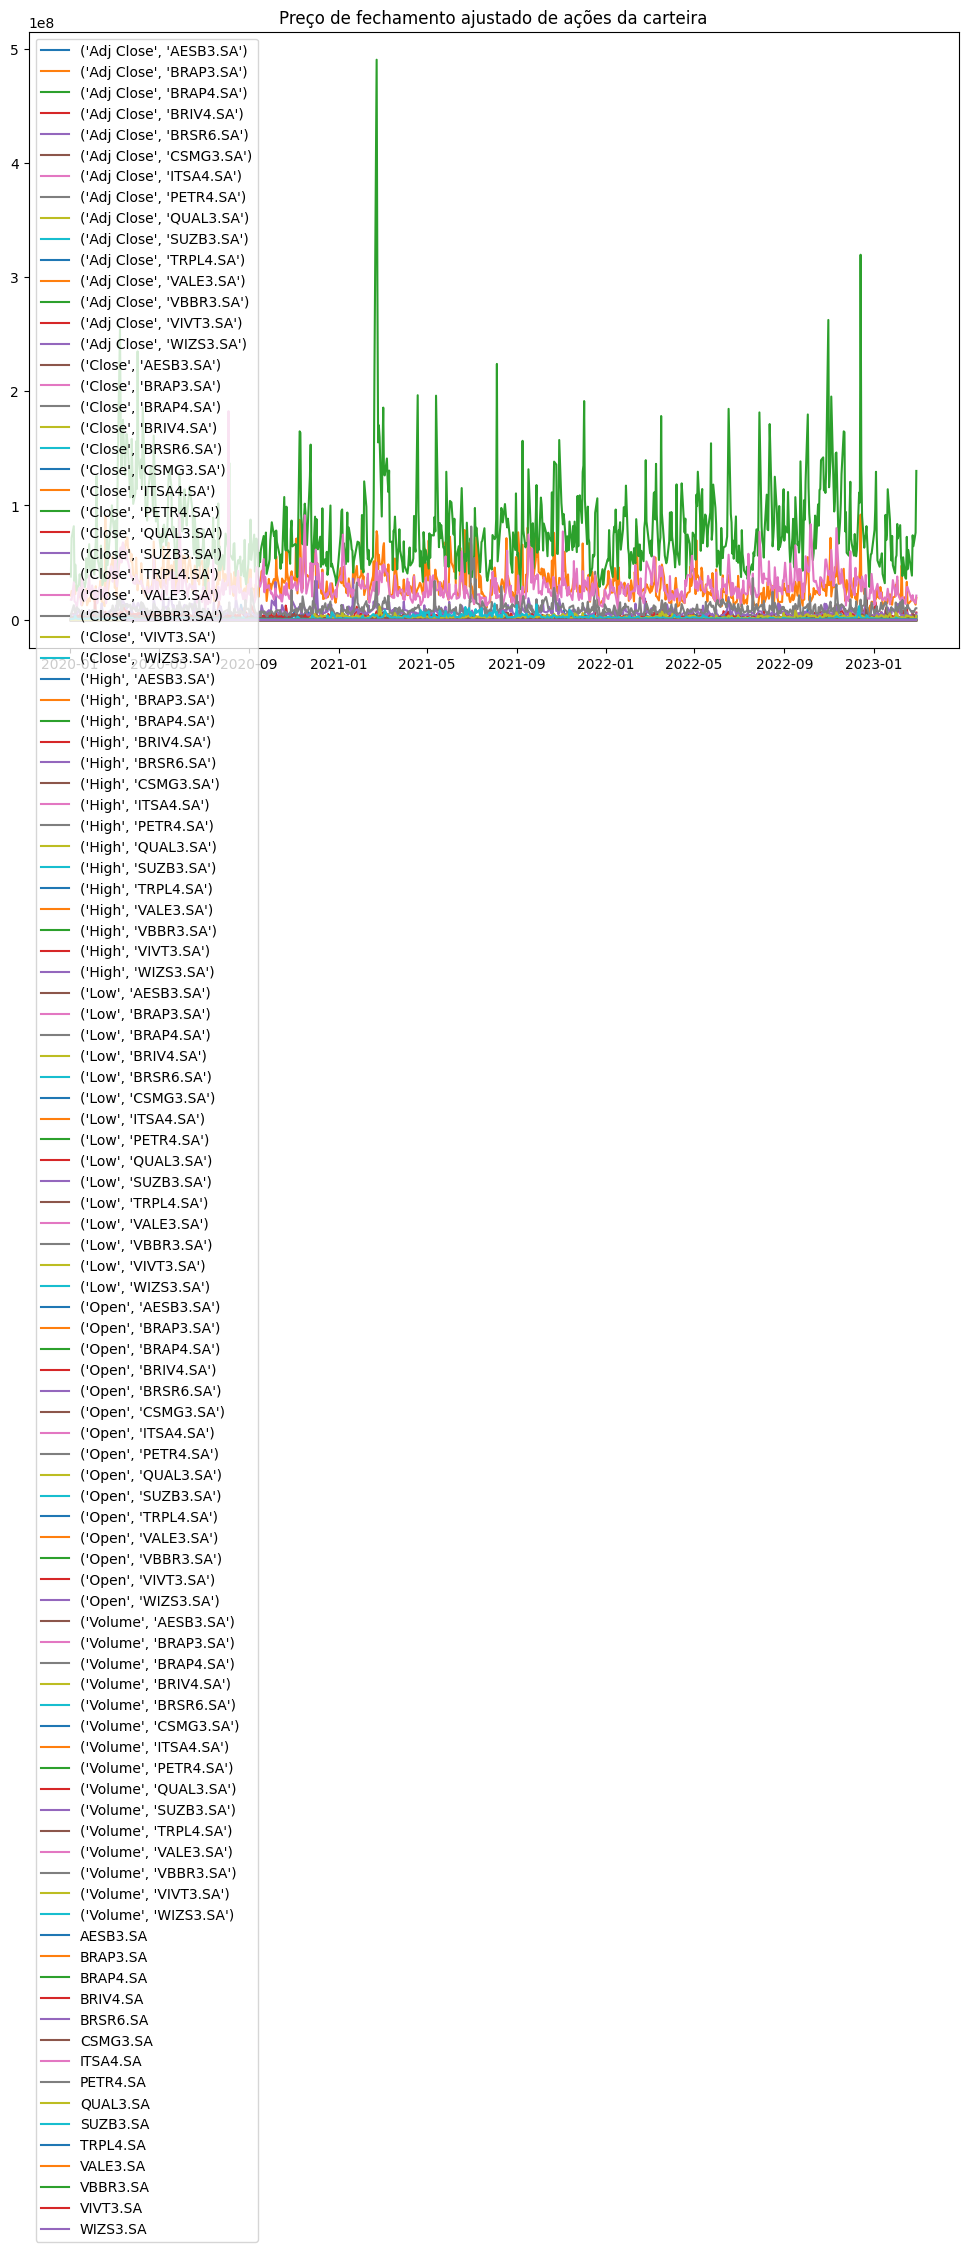

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

# obtém todos os tickers exclusivos da carteira
tickers = carteira.columns.unique()

# loop pelos tickers
for ticker in tickers:
    # plota a coluna de fechamento ajustado para o ticker atual
    plt.plot(carteira[ticker], label=ticker)

# adiciona legenda e título ao gráfico
plt.legend()
plt.title('Preço de fechamento ajustado de ações da carteira')
plt.show()

In [44]:
pip install quandl

     -------------------------------------- 54.2/54.2 kB 403.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
data = quandl.get(f'EOD/{symbol}.SA', start_date=start_date, end_date=end_date, column='Adjusted Close')

ValueError: The column index must be expressed as an integer for EOD/PETR4.SA.

In [49]:
import os
import pandas as pd
import quandl

# Insira sua chave da Quandl abaixo
quandl.ApiConfig.api_key = 'SUA_CHAVE_AQUI'

# Cria um objeto TimeSeries com a chave de API
quandl.ApiConfig.api_version = '2015-04-09'

# Define as ações e o número de ações de cada uma
portfolio = {'PETR4': 100, 'ITSA4': 200, 'BRAP3': 50, 'BRAP4': 50, 'QUAL3': 150,
             'VBBR3': 100, 'WIZS3': 200, 'BRSR6': 100, 'AESB3': 50, 'CSMG3': 100,
             'BRIV4': 50, 'VALE3': 100, 'TRPL4': 50, 'VIVT3': 50, 'SUZB3': 50}

# Define a data de início e fim dos preços históricos
start_date = '2021-01-01'
end_date = '2021-12-31'

# Obtém os preços históricos para cada ação
prices = {}
for symbol in portfolio.keys():
    data = quandl.get(f'EOD/{symbol}.SA', start_date=start_date, end_date=end_date, column_index=4)
    prices[symbol] = data['Adjusted Close']

# Cria um DataFrame com os preços históricos
df_prices = pd.DataFrame(prices)

# Calcula o valor total da carteira
portfolio_value = (df_prices * list(portfolio.values())).sum(axis=1).sum()

# Imprime o valor total da carteira
print(f'O valor total da sua carteira é R$ {portfolio_value:.2f}')

ValueError: The column index must be expressed as an integer for EOD/PETR4.SA.